<a href="https://colab.research.google.com/github/minsoojo/MLprogramming/blob/main/10week/RNN_LSTM_Alcohol_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# 1. 데이터 로드
# df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Alcohol_Sales.csv')
df = pd.read_csv('Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [18]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [19]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [33]:

model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)])

model.compile(optimizer='adam', loss='mse', metrics=["mae"])
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.1485 - mae: 0.2879
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0074 - mae: 0.0710
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0038 - mae: 0.0481
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0054 - mae: 0.0577
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - mae: 0.0374
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0019 - mae: 0.0329
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - mae: 0.0391
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020 - mae: 0.0333
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014 - mae: 0.0294
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0015 - mae: 0.0286
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 - mae: 0.0367
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0275
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 625ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


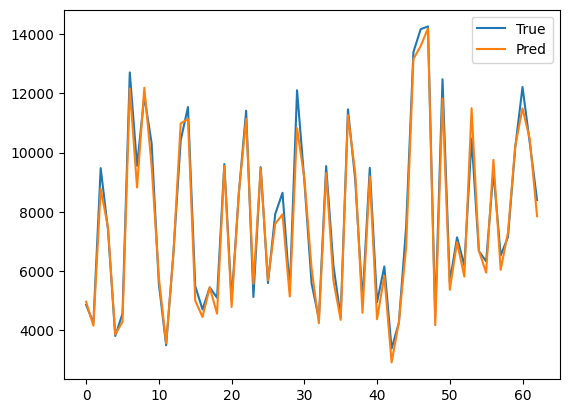

In [34]:
# 5. 예측
pred = model.predict(X_test)
plt.plot(scaler.inverse_transform(y_test), label='True')
plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.legend(); plt.show()

In [37]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test mse: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test mse: 0.0012
Test MAE: 0.0269


---

---

---

In [41]:
# 4. LSTM 모델
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(window,1)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=["mae"])
model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0981 - mae: 0.2501
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0115 - mae: 0.0845
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0082 - mae: 0.0638
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0074 - mae: 0.0631
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0062 - mae: 0.0576
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mae: 0.0600
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mae: 0.0633
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0067 - mae: 0.0594
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0084 - mae: 0.0665
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0076 - mae: 0.0650
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0069 - mae: 0.0620
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0071 - mae: 0.0635
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


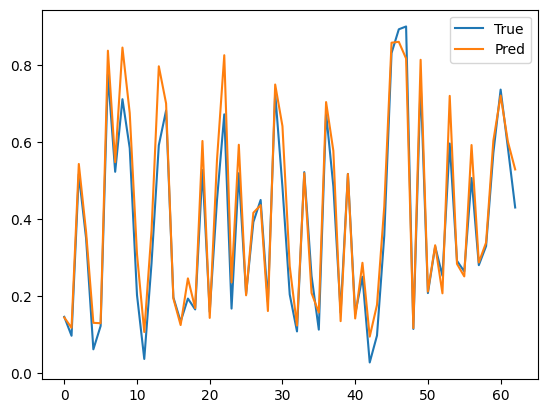

In [44]:
# 5. 예측
pred = model.predict(X_test)
# plt.plot(scaler.inverse_transform(y_test), label='True')
# plt.plot(scaler.inverse_transform(pred), label='Pred')
plt.plot(y_test, label='True')
plt.plot(pred, label='Pred')
plt.legend(); plt.show()

In [43]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test mse: {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

Test mse: 0.0043
Test MAE: 0.0476
